In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in sample.csv into a dataframe with \t delimiter
df = pd.read_csv('sample.csv', sep='\t')
print("Dataset shape: ", df.shape)
df.head()

Dataset shape:  (403212, 27)


,detecttime,hash,status,region,reorg,replace,curblocknumber,failurereason,blockspending,timepending,...,network,type,maxpriorityfeepergas,maxfeepergas,basefeepergas,dropreason,rejectionreason,stuck,gasused,detect_date
0,2023-02-24T00:00:00.167Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,us-east-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
1,2023-02-24T00:00:00.253Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,eu-central-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
2,2023-02-24T00:00:00.280Z,0x2b7cd2e8fd547f4ef784e6713a8c06926a0ff1ced45b...,pending,ap-southeast-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,3.000000e+09,4.702304e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
3,2023-02-24T00:00:00.374Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,eu-central-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24
4,2023-02-24T00:00:00.383Z,0x44bfc98df9a35e3cd4f144bba9e89afdb12122747dda...,pending,us-east-1,NaN,NaN,16694512,none,NaN,NaN,...,main,2,1.000000e+09,4.604646e+10,28122281784,NaN,NaN,False,-1.0,2023-02-24


In [27]:
# keep only the rows where region == 'us-east-1'
df_us = df[df['region'] == 'us-east-1']

In [6]:
# for each row, if the status != pending, add the hash to the list 
not_pending_hashes = []
for index, row in df_us.iterrows():
    if row['status'] != 'pending':
        not_pending_hashes.append(row['hash'])

In [7]:
# keep only the rows where hash is not in not_pending_hashes
df_us_pending = df_us[~df_us['hash'].isin(not_pending_hashes)]

In [8]:
## Sanity check ##
# get the unique status in df_us_pending
print("Unique status in df_us_pending: ", df_us_pending['status'].unique())

Unique status in df_us_pending:  ['pending']


In [28]:
# get shape of df_us_pending
print("Shape of df_us_pending: ", df_us_pending.shape)

Shape of df_us_pending:  (585, 30)


In [11]:
# get the detecttime of the last row in df
last_detecttime = df.iloc[-1]['detecttime']

# create a new column in df_us_pending that converts the detecttime column to datetime
df_us_pending['datetime'] = pd.to_datetime(df_us_pending['detecttime'])

last_detecttime = pd.to_datetime(last_detecttime)

# create a new column in df_us_pending called total_pending_time that is the difference between last_detecttime and detecttime
df_us_pending['total_pending_time'] = last_detecttime - df_us_pending['datetime']


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_74022/3117422420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_pending['datetime'] = pd.to_datetime(df_us_pending['detecttime'])
/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_74022/3117422420.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_pending['total_pending_time'] = last_detecttime - df_us_pending['datetime']


In [19]:
# create a new column "floattime" in df_us_pending that converts the total_pending_time column to float in seconds

df_us_pending['floattime'] = df_us_pending['total_pending_time'].dt.total_seconds()


/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_74022/1182603538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_pending['floattime'] = df_us_pending['total_pending_time'].dt.total_seconds()


In [32]:
# print the first and last 5 columns 'detecttime' 'datetime' 'total_pending_time' 'floattime'
print("head:")
print(df_us_pending[['detecttime', 'datetime', 'total_pending_time', 'floattime']].head())
print("\n\n\ntail:")
print(df_us_pending[['detecttime', 'datetime', 'total_pending_time', 'floattime']].tail())

head:
                    detecttime                         datetime  \
105   2023-02-24T00:00:02.590Z 2023-02-24 00:00:02.590000+00:00   
651   2023-02-24T00:00:08.876Z 2023-02-24 00:00:08.876000+00:00   
1281  2023-02-24T00:00:12.795Z 2023-02-24 00:00:12.795000+00:00   
6330  2023-02-24T00:00:42.090Z 2023-02-24 00:00:42.090000+00:00   
7365  2023-02-24T00:00:51.786Z 2023-02-24 00:00:51.786000+00:00   

         total_pending_time  floattime  
105  0 days 00:59:57.325000   3597.325  
651  0 days 00:59:51.039000   3591.039  
1281 0 days 00:59:47.120000   3587.120  
6330 0 days 00:59:17.825000   3557.825  
7365 0 days 00:59:08.129000   3548.129  



tail:
                      detecttime                         datetime  \
403193  2023-02-24T00:59:59.187Z 2023-02-24 00:59:59.187000+00:00   
403199  2023-02-24T00:59:59.375Z 2023-02-24 00:59:59.375000+00:00   
403204  2023-02-24T00:59:59.496Z 2023-02-24 00:59:59.496000+00:00   
403208  2023-02-24T00:59:59.711Z 2023-02-24 00:59:59.711000+

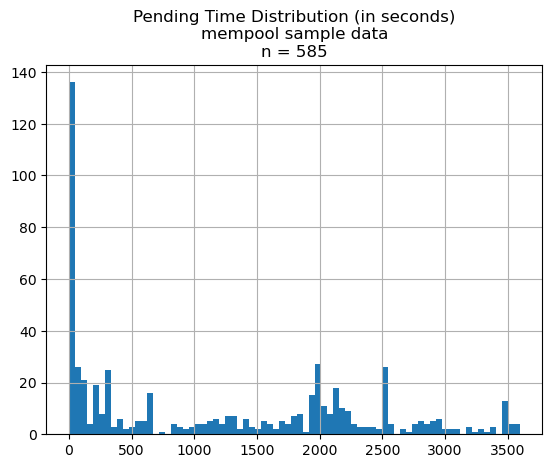

In [43]:
num_rows = df_us_pending.shape[0]

#graph the distribution of floattime 
df_us_pending['floattime'].hist(bins=75)
plt.title("Pending Time Distribution (in seconds)\nmempool sample data\nn = "+ str(num_rows))
plt.show()


In [26]:
# get the mean, median, and mode of floattime
print("Mean: ", df_us_pending['floattime'].mean(), "seconds")
print("Median: ", df_us_pending['floattime'].median(), "seconds")
print("Mode: ", df_us_pending['floattime'].mode())


Mean:  1187.1738512820511 seconds
Median:  1053.342 seconds
Mode:  0     320.521
1    1974.197
Name: floattime, dtype: float64
